# Spring 2023 AZMP Drifter Deployment Plan

We plan to deploy several drifters at AZMP stations during the Spring 2023 cruise. This document outlines the drifter inventory and ideal deployment locations.

Tentative Dates: Apr 3-Apr 25, 2023

## Goals
* Create an inventory of drifter data on NL Shelf for model evaluation 
* Transmit data to GTS to support operational weather and ocean forecasting
* Examine bifurcation of Labrador current along Bonvista transect


## Drifter Inventory
| Name       | Type    | Quantity | Data collected                |
|------------|---------|----------|-------------------------------|
| iSVP       | Drogued | 4        | Position/Temperature/Pressure |
| stokes     | surface | 6        | Position/Temperature          |
| code/davis | Drogued | 2        | Position/Temperature          |


## Deployment Areas

1. Bonavista Line
2. Flemish Cap Line

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
lat_min=45
lon_min=-60
lat_max=56
lon_max=-40

In [3]:
# Glorys climatology
f='/ocean/handres/glorys12/Allvars_glorys12_1993-2018_daily04.nc'
d = xr.open_dataset(f)
dsel = d.isel(depth=0).sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min, lon_max)).mean(dim='time')
uvel = dsel.uo.values
vvel = dsel.vo.values
lat = dsel.latitude.values
lon = dsel.longitude.values
lon, lat = np.meshgrid(lon, lat)

In [4]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [5]:
def plot_quivers(ax, xvel,yvel,lat,lon,st=10):
    mag = np.sqrt(xvel**2+yvel**2)
    mesh=ax.pcolormesh(lon,lat,mag,vmin=0,vmax=1,cmap='YlGnBu_r', transform=ccrs.PlateCarree())
    q=ax.quiver(lon[::st,::st],lat[::st,::st],xvel[::st,::st],yvel[::st,::st],
                  scale=10,color='lightgrey', transform=ccrs.PlateCarree())
    ax.quiverkey(q,0.05,0.4,0.5,'0.5 m/s',color='lightgrey')
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('speed [m/s]')

In [6]:
def plot_transects(ax,transects):
    for transect in transects:
        lons = np.array([transects[transect]['start'][0],
                         transects[transect]['end'][0]])
        lats = np.array([transects[transect]['start'][1],
                         transects[transect]['end'][1]])
        ax.plot(lons, lats,'-r', transform=ccrs.PlateCarree())

In [7]:
def plot_stations(ax,stations):
    for station in stations:
        lon = stations[station][0]
        lat = stations[station][1]
        if 'BB' in station:
            marker='o'
        else:
            marker = 's'
        ax.plot(lon, lat,marker, label=station, markeredgecolor='k',markersize=10, transform=ccrs.PlateCarree())

In [8]:
def plot_bathymetry( ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    bathy = etopo.z.values
    levels = [-500, -200, -100,]
    CS = ax.contour(lons,lats,bathy,levels, linestyles='solid', linewidth=0.1,colors='black',transform=ccrs.PlateCarree())
    ax.clabel(CS, CS.levels, inline=True, fmt='%1.0f', fontsize=12)

# Plots

In [9]:
transects = {
    'BB': {'start': [-52.9666666666667,48.7333333333333],
           'end': [-47.9466666666667,50.3316666666667]},
    #'SI': {'start': [-55.65,53.233],
    #       'end': [-52.5,55.067]},
    'FC': {'start':[ -52.8316666666667, 47],
           'end': [-42, 47]},
    #'S27': {'start': [-52.5866666666667,47.5466666666667],
    #        'end': [-48.41,48.4333333333333]}
}
stations = {
    #'BB-01': [-52.9666666666667,48.7333333333333],
    #'BB-02': [-52.75,48.8],
    'BB-03 \n 3 Stokes \n 1 Code/Davis': [-52.65,48.8333333333333],
    'BB-04 \n 3 Stokes \n 1 Code/Davis': [-52.4,48.9166666666667],
    #'BB-05': [-52.0666666666667,49.025],
    #'BB-06': [-51.83, 49.10],
    #'BB-07': [-51.54, 49.19],
    #'BB-08': [-51.28,49.28],
    'BB-11 \n 1 SVP': [-50.0166666666667,49.6833333333333],
    'BB-13 \n 1 SVP': [-49, 50], 
    #'SI-01': [-55.650, 53.233 ],
    #'SI-02': [-55.500, 53.333 ],
    #'SI-03': [-55.357, 53.410 ],
    #'SI-04': [-55.145, 53.533 ],
    #'SI-05': [-55.000, 53.617 ],
    #'SI-06': [-54.777, 53.757 ], 
    #'SI-07': [-54.500, 53.917 ],
    #'SI-11': [-53.500, 54.500 ],
    #'SI-12': [-53.250, 54.633 ],
    #'SI-13': [-53.000, 54.783 ],
    #'SI-14': [-52.500, 55.067 ],
    #'FC-06': [-51.485,47],
    #'FC-09': [-50,47],
    'FC-25 \n 1 SVP': [-44.9883333333333,47],
    #'FC-26': [-44.772,47.000],
    #'FC-31': [-43.833,47.000],
    'FC-38 \n 1 SVP': [-42,47], 
    #'S27-05': [-51.65,47.74],
    #'S27-10': [-50.48,47.99]
}

/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


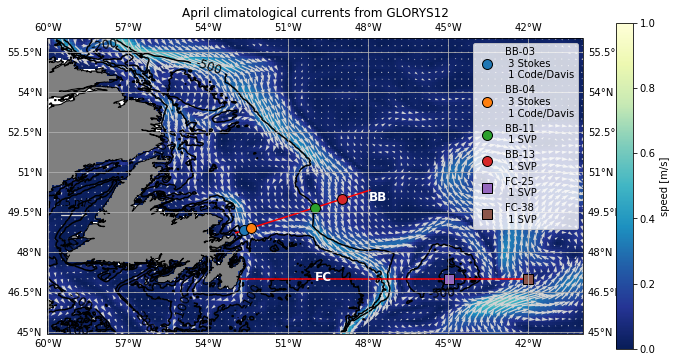

In [10]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
plot_quivers(ax,uvel,vvel,lat, lon,st=3)
plot_bathymetry( ax, esel)
plot_transects(ax, transects)
plot_stations(ax, stations)

ax.text(0.6,0.45, 'BB', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
#ax.text(0.4,0.85, 'SI', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.text(0.5,0.18, 'FC', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
#ax.text(0.6,0.3, 'S27', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.set_title('April climatological currents from GLORYS12')
ax.legend(loc='upper right')

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.LAND, color='grey')

/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


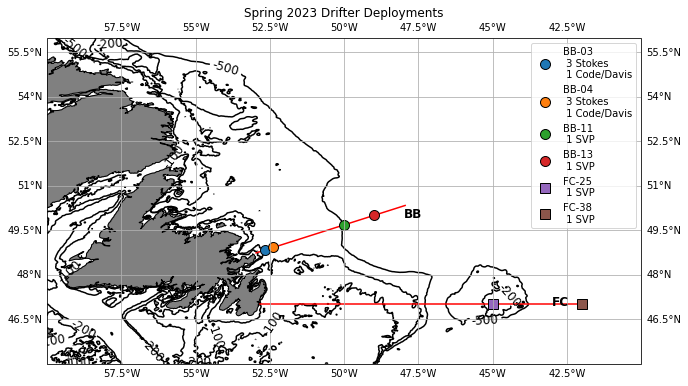

In [11]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
#plot_quivers(ax,uvel,vvel,lat, lon,st=3)
plot_bathymetry( ax, esel)
plot_transects(ax, transects)
plot_stations(ax, stations)

ax.text(0.6,0.45, 'BB', fontsize=12,color='k', transform=ax.transAxes,fontweight='bold')
#ax.text(0.4,0.85, 'SI', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.text(0.85,0.18, 'FC', fontsize=12,color='k', transform=ax.transAxes,fontweight='bold')
#ax.text(0.6,0.3, 'S27', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.set_title('Spring 2023 Drifter Deployments')
ax.legend(loc='upper right')

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.LAND, color='grey')


In [12]:
fig.savefig('Spring2023deploymentplan.png', bbox_inches='tight')